# Contents

1. Auto MPG Data Set
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remarks

# 1. Auto MPG Data Set

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

# 2. Problem Definition

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


1. We will analyse how our target variable i.e mpg is effected by other independable variables.
2. We will find out what factors are positively correlated and negatively correlated with our target variable.
3. We will find out which model is best suited to predict mpg.

# 3. Data Analysis(EDA)

3.1 First we will import all the required libraries and load the dataset.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [60]:
columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']

In [61]:
df=pd.read_csv('mgp.csv',sep='\t',names=columns,header=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [62]:
#Lets check null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

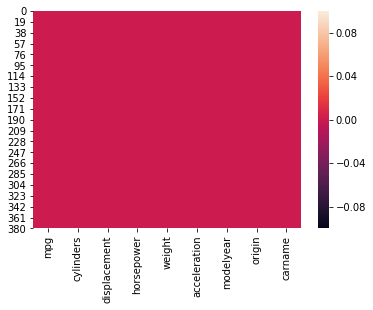

In [63]:
sns.heatmap(df.isnull())

In [64]:
#lets check data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [65]:
#lets first convert all categorial values into numerical values.
le = LabelEncoder()
list1 = ['horsepower','carname']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [66]:
#lets again check data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname           int32
dtype: object

In [67]:
#Lets describe the data statistically
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,50.896725,2969.080605,15.577078,76.025189,1.574307,148.801008
std,7.820926,1.698329,104.244898,29.720192,847.485218,2.755326,3.689922,0.802549,89.468708
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.000000,27.000000,2223.000000,13.900000,73.000000,1.000000,66.000000
50%,23.000000,4.000000,146.000000,60.000000,2800.000000,15.500000,76.000000,1.000000,150.000000
75%,29.000000,8.000000,262.000000,78.000000,3609.000000,17.200000,79.000000,2.000000,226.000000
max,46.600000,8.000000,455.000000,93.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


In [68]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
mpg,1.000000,-0.775412,-0.803972,0.450731,-0.831558,0.419133,0.578667,0.562894,0.272552
cylinders,-0.775412,1.000000,0.950718,-0.573726,0.896623,-0.503016,-0.344729,-0.561796,-0.272748
displacement,-0.803972,0.950718,1.000000,-0.509555,0.932957,-0.542083,-0.367470,-0.608749,-0.289892
horsepower,0.450731,-0.573726,-0.509555,1.000000,-0.509559,0.285826,0.141939,0.285383,0.171371
weight,-0.831558,0.896623,0.932957,-0.509559,1.000000,-0.416488,-0.305150,-0.580552,-0.254002
acceleration,0.419133,-0.503016,-0.542083,0.285826,-0.416488,1.000000,0.284376,0.204102,0.125110
modelyear,0.578667,-0.344729,-0.367470,0.141939,-0.305150,0.284376,1.000000,0.178441,0.070541
origin,0.562894,-0.561796,-0.608749,0.285383,-0.580552,0.204102,0.178441,1.000000,0.358844
carname,0.272552,-0.272748,-0.289892,0.171371,-0.254002,0.125110,0.070541,0.358844,1.000000


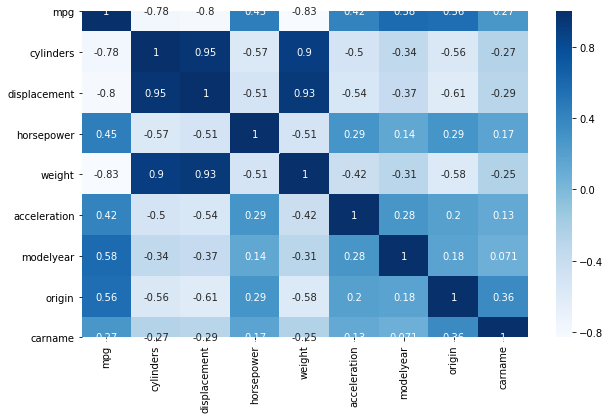

In [69]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

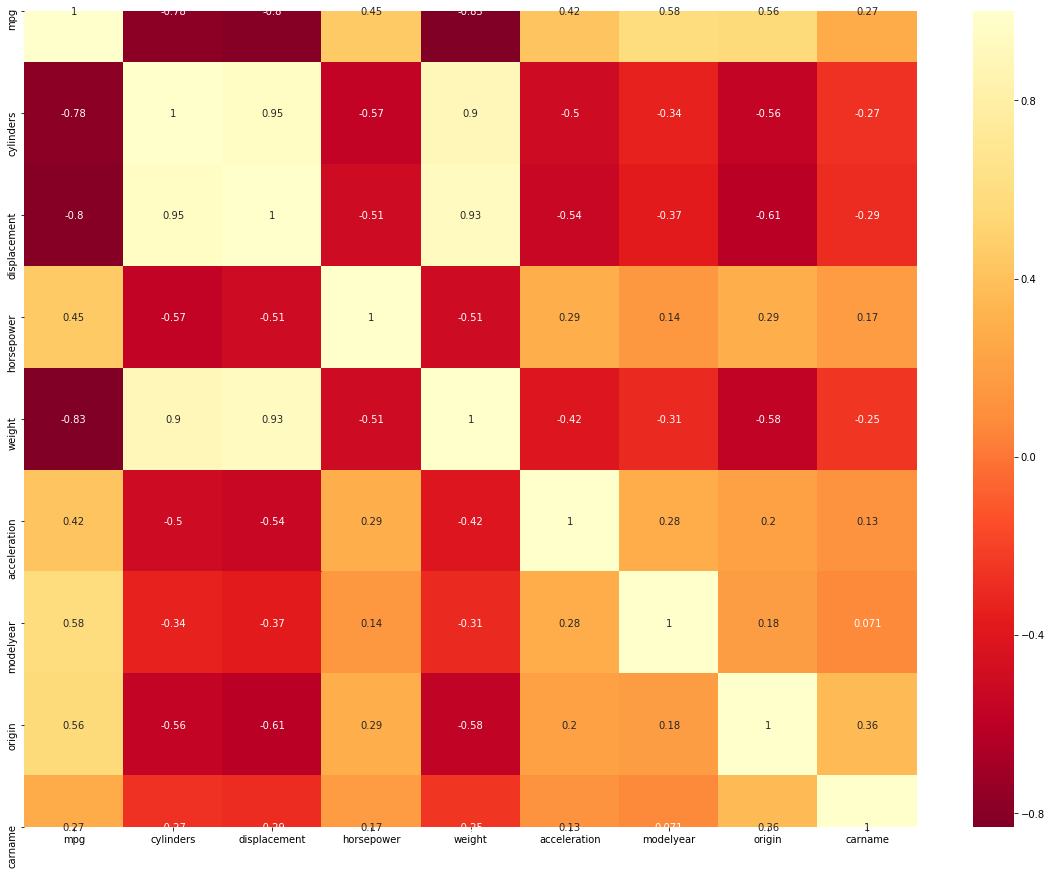

In [70]:
plt.figure(figsize = (20,15))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [14]:
#Since weight, displacement and cylinders are very negatively correlated so we will drop these columns

In [71]:
df.drop('weight',axis=1,inplace=True)
df.drop('displacement',axis=1,inplace=True)
df.drop('cylinders',axis=1,inplace=True)

In [72]:
df.shape

(397, 6)

In [73]:
#lets check the skewness
df.skew()

mpg             0.452893
horsepower     -0.322679
acceleration    0.275880
modelyear       0.010233
origin          0.919911
carname         0.013775
dtype: float64

In [74]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [75]:
df.skew()

mpg             0.452893
horsepower     -0.322679
acceleration    0.275880
modelyear       0.010233
origin          0.792604
carname         0.013775
dtype: float64

In [19]:
collist=df.columns.values
ncol=15
nrows=15

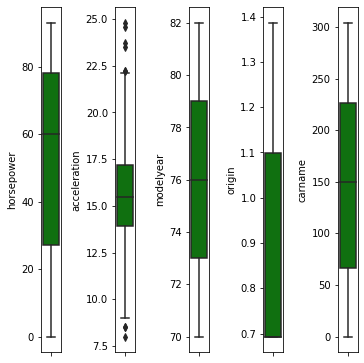

In [20]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [77]:
#Lets do bivariate analysis with target variable.

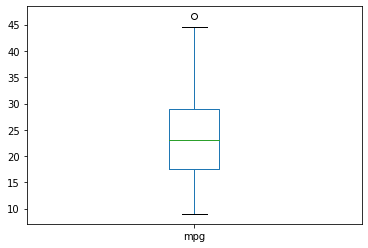

In [78]:
df['mpg'].plot.box()

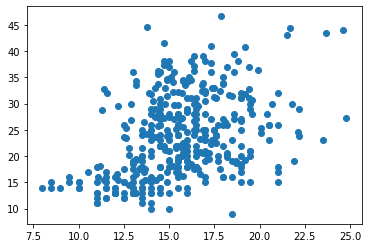

In [21]:
plt.scatter(df['acceleration'],df['mpg'])

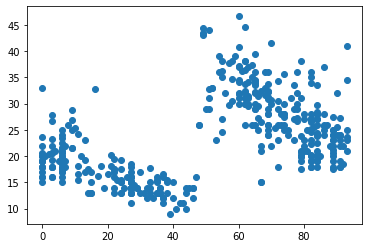

In [79]:
plt.scatter(df['horsepower'],df['mpg'])

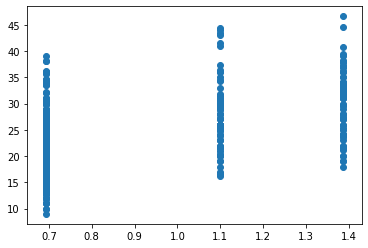

In [80]:
plt.scatter(df['origin'],df['mpg'])

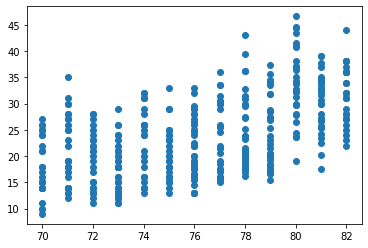

In [86]:
plt.scatter(df['modelyear'],df['mpg'])

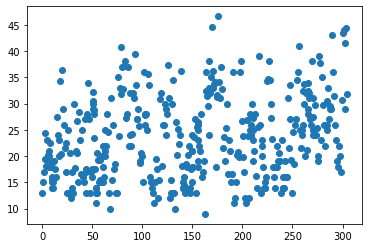

In [88]:
plt.scatter(df['carname'],df['mpg'])

# Pre-processing Pipeline


In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.09184315, 0.60293379, 1.48157516, 1.63493738, 0.73704171,
        1.26237816],
       [0.70777286, 0.80507148, 1.66327087, 1.63493738, 0.73704171,
        0.91990502],
       [0.96381972, 0.80507148, 1.29987946, 1.63493738, 0.73704171,
        1.50858447],
       ...,
       [1.08455517, 0.91309889, 1.44523602, 1.62126734, 0.73704171,
        0.33350891],
       [0.57246145, 0.74465081, 1.09850386, 1.62126734, 0.73704171,
        0.11413892],
       [0.95653174, 0.84571966, 1.38921699, 1.62126734, 0.73704171,
        0.8930687 ]])

In [24]:
threshold=3
print(np.where(z>3))

(array([298, 393], dtype=int64), array([2, 2], dtype=int64))


In [25]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers

In [26]:
df_new.shape

(395, 6)

In [27]:
df.shape

(397, 6)

# 5.Building Machine Learning Models

Since our target variable is continuous variable, there we will take regression models.

In [53]:
#Now lets train and test our data. Here our target variable is y i.e mpg, and our input variables is x

In [28]:
df_new

,mpg,horsepower,acceleration,modelyear,origin,carname
0,15.0,33,11.5,70,0.693147,36
1,18.0,27,11.0,70,0.693147,231
2,16.0,27,12.0,70,0.693147,14
3,17.0,22,10.5,70,0.693147,161
4,15.0,40,10.0,70,0.693147,141
...,...,...,...,...,...,...
391,27.0,84,17.3,82,0.693147,43
392,27.0,80,15.6,82,0.693147,153
394,32.0,78,11.6,82,0.693147,119
395,28.0,73,18.6,82,0.693147,159


In [29]:
x=df_new.iloc[:,1:]

In [30]:
x

,horsepower,acceleration,modelyear,origin,carname
0,33,11.5,70,0.693147,36
1,27,11.0,70,0.693147,231
2,27,12.0,70,0.693147,14
3,22,10.5,70,0.693147,161
4,40,10.0,70,0.693147,141
...,...,...,...,...,...
391,84,17.3,82,0.693147,43
392,80,15.6,82,0.693147,153
394,78,11.6,82,0.693147,119
395,73,18.6,82,0.693147,159


In [31]:
y=df_new[['mpg']]

In [58]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 94 is 0.7390520149310098


In [62]:
#lets cross validate to avoid over fitting and undefitting of the model

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.32538564275689064

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 94,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [36]:
lreg.score(x_train,y_train)

0.617255462933229

In [38]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score:',r2_score(y_test,pred))

error
Mean squared: 3.3499286695946164
Mean Squared error: 16.54657166340413
Root Mean Squared Error: 4.067747738417923
r2 score: 0.7390520149310098


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae'],
    'random_state' :[42,46,55,58]
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='r2',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}
0.679122506426872


In [50]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 42, max_features = 'sqrt', max_depth = 8, criterion = 'mae')
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
rf.score(x_train,y_train)

0.9480896862895514

In [52]:
pred = rf.predict(x_test)
pred

array([16.12025, 24.20475, 22.0005 , 22.1725 , 19.33375, 14.643  ,
       28.23625, 27.59825, 17.47975, 31.2145 , 34.847  , 32.299  ,
       13.66425, 24.334  , 29.017  , 20.02475, 32.3145 , 28.73925,
       31.14725, 26.4595 , 15.3695 , 17.2625 , 30.232  , 15.0675 ,
       14.68575, 19.08275, 24.83525, 29.44725, 13.73425, 31.80425,
       20.37725, 33.8955 , 28.67075, 14.27875, 24.46675, 23.49825,
       13.375  , 14.7    , 23.14275, 21.46625, 27.6725 , 33.55925,
       19.44075, 31.965  , 13.1275 , 33.327  , 34.22975, 16.49475,
       18.0055 , 34.265  , 17.9645 , 14.20525, 30.85175, 31.00325,
       12.975  , 36.7495 , 26.382  , 27.177  , 13.87175, 15.01825,
       23.826  , 13.57   , 23.136  , 23.07125, 23.86325, 14.673  ,
       25.023  , 17.63425, 24.27925, 33.90425, 14.0925 , 13.14525,
       26.25225, 14.53825, 24.76075, 24.26925, 33.14725, 20.99525,
       16.2605 ])

In [53]:
#lets cross validate to avoid over fitting and undefitting of the model

In [54]:
cross_val_score(rf,x,y,cv=10,scoring ='r2').mean()

0.6847251518523646

In [82]:
#rf is giving the best score so we will save this model.

In [84]:
from sklearn.externals import joblib
joblib.dump(rf,'rfmpg.obj')
rf_from_joblib = joblib.load('rfmpg.obj')
rf_from_joblib.predict(x_test) 

array([16.12025, 24.20475, 22.0005 , 22.1725 , 19.33375, 14.643  ,
       28.23625, 27.59825, 17.47975, 31.2145 , 34.847  , 32.299  ,
       13.66425, 24.334  , 29.017  , 20.02475, 32.3145 , 28.73925,
       31.14725, 26.4595 , 15.3695 , 17.2625 , 30.232  , 15.0675 ,
       14.68575, 19.08275, 24.83525, 29.44725, 13.73425, 31.80425,
       20.37725, 33.8955 , 28.67075, 14.27875, 24.46675, 23.49825,
       13.375  , 14.7    , 23.14275, 21.46625, 27.6725 , 33.55925,
       19.44075, 31.965  , 13.1275 , 33.327  , 34.22975, 16.49475,
       18.0055 , 34.265  , 17.9645 , 14.20525, 30.85175, 31.00325,
       12.975  , 36.7495 , 26.382  , 27.177  , 13.87175, 15.01825,
       23.826  , 13.57   , 23.136  , 23.07125, 23.86325, 14.673  ,
       25.023  , 17.63425, 24.27925, 33.90425, 14.0925 , 13.14525,
       26.25225, 14.53825, 24.76075, 24.26925, 33.14725, 20.99525,
       16.2605 ])

In [85]:
df_new.columns

Index(['mpg', 'horsepower', 'acceleration', 'modelyear', 'origin', 'carname'], dtype='object')

# 6. Conclusion

Mpg is positively correlated with horsepower, acceleration, modelyear , origin and carname

cars with horsepower ranges (60-80) more mpg is consumed.

Cars with model year 80 has consumed more mpg.

Horsepower data is negatively skewed meaning data is not evenly distributed.